# Poisonous Mushroom Detection

This project aims to predict poisonous mushroom based on the mushrooms' attributes

## Steps

* Libraries Importing I
* Data Importing 
* Data Wrangling
* Data Visualization
* Libraries Importing II
* Model Creation and Prediction
* Model parameters tuning and Prediction

# Libraries Importing

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [74]:
warnings.filterwarnings("ignore")

# Data Importing

In [2]:
mushroom_df = pd.read_csv("mushrooms.csv")

In [3]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Wrangling

In [4]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values

In [6]:
mushroom_df.duplicated().sum()

0

There are no duplicates

# Data Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

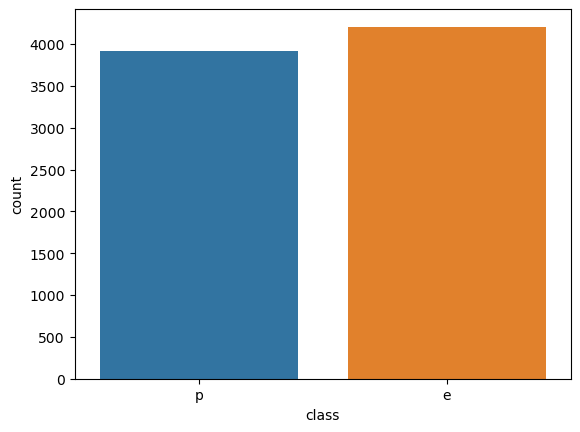

In [7]:
sns.countplot(data=mushroom_df, x="class")

The dataset is roughly balanced. Cheking the variation of unique possible values per features we have;

In [8]:
mushroom_df.describe().transpose().reset_index().sort_values("unique")

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


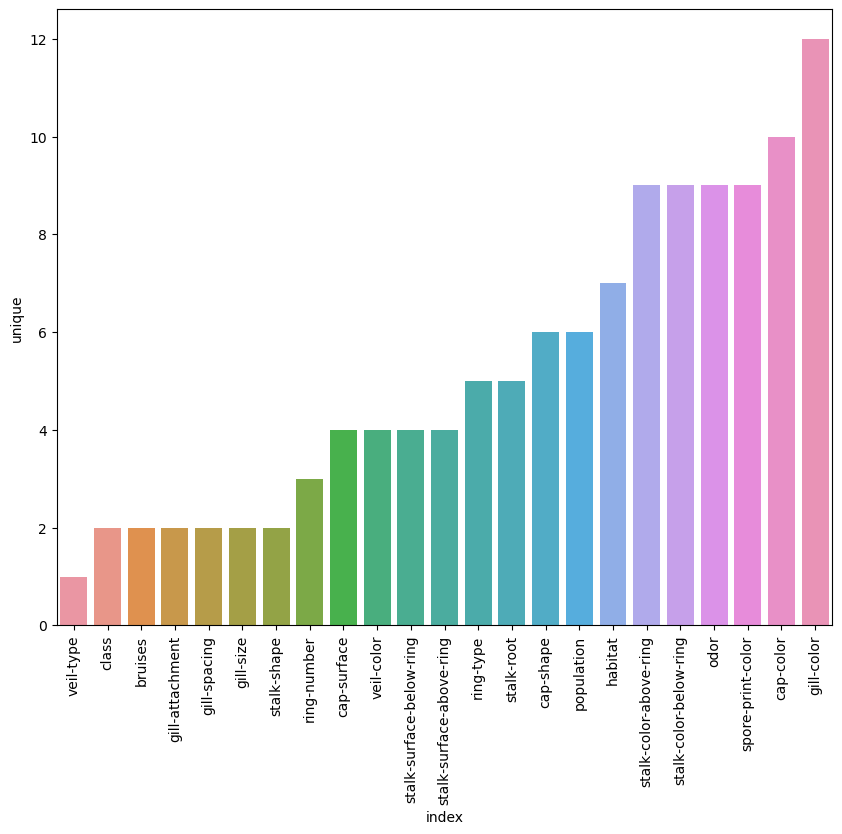

In [9]:
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(data=mushroom_df.describe().transpose().reset_index().sort_values("unique"), x="index", y="unique")
plt.xticks(rotation=90);

# Libraries Importing II

In [58]:
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Model Creation and Prediction

In [11]:
X = mushroom_df.drop("class", axis=1)
X = pd.get_dummies(X, drop_first=True)
y = mushroom_df['class']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=97)

In [44]:
ada_model = AdaBoostClassifier(n_estimators=1)
gradient_model = GradientBoostingClassifier(n_estimators=1)

In [45]:
ada_model.fit(X_train, y_train)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1)

In [46]:
ada_predictions = ada_model.predict(X_test)
gradient_predictions = gradient_model.predict(X_test)

In [47]:
print("AdaBoost\n",classification_report(ada_predictions, y_test),"\n")
print("Gradient Boosting\n",classification_report(gradient_predictions, y_test),"\n")

AdaBoost
               precision    recall  f1-score   support

           e       0.80      0.96      0.88       532
           p       0.97      0.82      0.89       687

    accuracy                           0.88      1219
   macro avg       0.88      0.89      0.88      1219
weighted avg       0.89      0.88      0.88      1219
 

Gradient Boosting
               precision    recall  f1-score   support

           e       0.98      1.00      0.99       623
           p       1.00      0.97      0.99       596

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219
 



It can be observed that the dataset is somewhat seperated as a single estimator of the AdaBoost and Gradient Boosting Algorithms is enough to give such a high degree of accuracy.
Next, we try to figure out the variable with the argest effect on the algorithms as follows;

In [48]:
ada_model.feature_names_in_[ada_model.feature_importances_.argmax()]

'odor_n'

In [49]:
gradient_model.feature_names_in_[gradient_model.feature_importances_.argmax()]

'odor_n'

It is seen that both algorithms give the odor tagged "n" the highest degree of importance

<AxesSubplot:xlabel='odor', ylabel='count'>

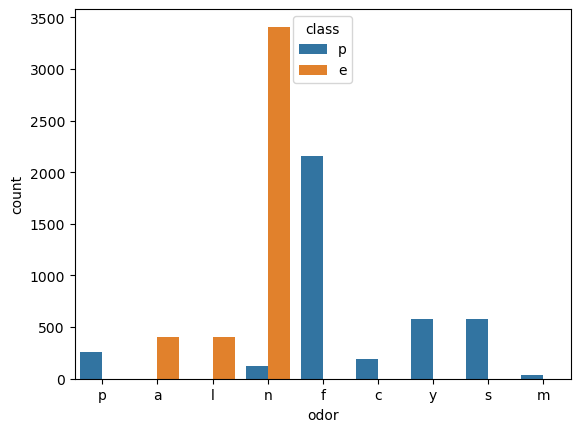

In [26]:
sns.countplot(data=mushroom_df, x="odor", hue="class")

The reason for importance assignment is very obvious in the plot above as for the n-tagged odor, there exist a large discrepancy in the number of mushroom belonging to both groups under the n-tagged odor.

# Model parameters tuning and Prediction

In [59]:
ada_error_rates = []

for i in range(1, 100):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=randint(0,1000))
    
    ada_model = AdaBoostClassifier(n_estimators=i)
    ada_model.fit(X_train, y_train)
    preds = ada_model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    
    ada_error_rates.append(err)

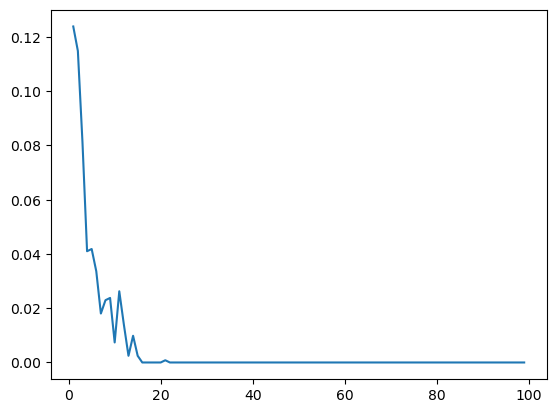

In [60]:
plt.plot(range(1, 100), ada_error_rates)

In [61]:
grad_error_rates = []

for i in range(1, 100):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=randint(0,1000))    

    grad_model = GradientBoostingClassifier(n_estimators=i)
    grad_model.fit(X_train, y_train)
    preds = grad_model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    
    grad_error_rates.append(err)

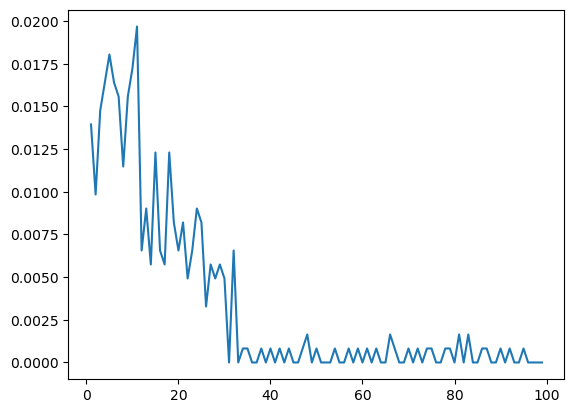

In [62]:
plt.plot(range(1, 100), grad_error_rates)

Using the elbow rule, the best number of estimators for the Adaboost is 17 estimators and 23 for the Gradient Boosting and using that we check the most importance features

In [63]:
ada_model = AdaBoostClassifier(n_estimators=17)
gradient_model = GradientBoostingClassifier(n_estimators=23)

In [64]:
ada_model.fit(X_train, y_train)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=23)

In [69]:
ada_feats = pd.DataFrame(data = ada_model.feature_importances_, index=ada_model.feature_names_in_, columns=["Importance"])
ada_feats_imp = ada_feats.sort_values("Importance", ascending=False)[ada_feats.sort_values("Importance", ascending=False)["Importance"] > 0.001]
ada_feats_imp

,Importance
gill-size_n,0.176471
odor_n,0.117647
population_v,0.117647
spore-print-color_r,0.058824
odor_c,0.058824
stalk-shape_t,0.058824
spore-print-color_w,0.058824
population_c,0.058824
odor_p,0.058824
ring-type_p,0.058824


In [68]:
grad_feats = pd.DataFrame(data = gradient_model.feature_importances_, index=gradient_model.feature_names_in_, columns=["Importance"])
grad_feats_imp = grad_feats.sort_values("Importance", ascending=False)[grad_feats.sort_values("Importance", ascending=False)["Importance"] > 0.001]
grad_feats_imp

,Importance
odor_n,0.626914
stalk-root_c,0.134033
bruises_t,0.054841
stalk-surface-below-ring_y,0.040527
spore-print-color_r,0.035237
stalk-root_r,0.027289
odor_l,0.021308
spore-print-color_h,0.013899
stalk-root_e,0.005582
gill-spacing_w,0.005444


In [75]:
ada_feats_imp.index & grad_feats_imp.index

Index(['gill-size_n', 'odor_n', 'spore-print-color_r', 'odor_c', 'odor_p',
       'ring-type_p', 'gill-spacing_w', 'odor_f'],
      dtype='object')

This shows the common features for both the Adaboost and Gradient Boosting models